In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from faker import Faker
print('Done')

Done


In [20]:
# Definir los datos
x_values = [random.uniform(0.46, 0.66) for _ in range(100)]
y_values = [5*x - 1.3 + random.gauss(0, 0.05) for x in x_values]

df = pd.DataFrame({'Longitud': y_values,'Tiempo': x_values})
df.head(100)

,Longitud,Tiempo
0,1.879562,0.628769
1,1.198701,0.529535
2,1.426862,0.543513
3,1.390058,0.518476
4,1.143448,0.483422
...,...,...
95,1.286931,0.509906
96,1.214077,0.497377
97,1.724068,0.610444
98,1.540827,0.580896


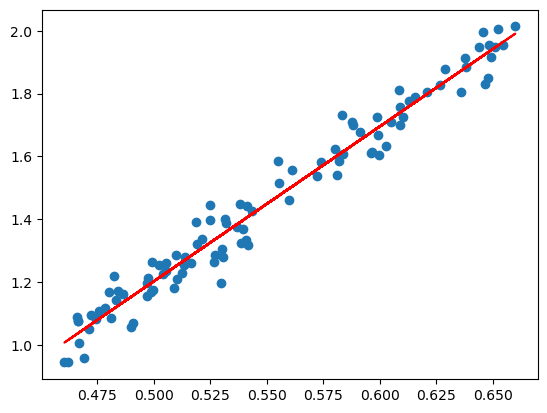

In [21]:
# Ajustar una recta de regresión lineal
m, b = np.polyfit(x_values, y_values, 1)

# Graficar los datos y la recta de regresión
plt.scatter(x_values, y_values)
plt.plot(x_values, m*np.array(x_values) + b, color='red')
plt.show()

In [24]:
def simulacion(longitud, tiempo):
    '''Funcion que simula el experimento de calcular la gravedad, conocidos la longitud y el tiempo de caida'''
    # GRAVEDAD
    g_calculado = (2 * longitud) / (tiempo**2)

    # ERROR
    L_error = 0.01 # VALOR YA DADO
    t_error = 0.01 # VALOR YA DADO
    dg_dL = 2 / tiempo**2 #Derivada parcial g respecto l
    dg_dt = -4 * longitud / tiempo**3 #Derivada parcial g respecto t
    g_error = np.sqrt((dg_dL * L_error)**2 + (dg_dt * t_error)**2) # Error de la gravedad

    #print("Gravedad calculada: ", g_calculado)
    #print("Error de la gravedad: ", g_error)
    return g_calculado, g_error

# AÑADIMOS LA GRAVEDAD CLACULADA AL DATAFRAME
df_g = df.copy()  # hacemos una copia del dataframe
g_calculado=[]  # columna que vamos a añadir al dataframe

for i in range(100):
    g_calculado.append(simulacion(df.Longitud[i], df.Tiempo[i])[0])  # añadimos la gravedad calculada a la lista g_calculado

# añadimos la nueva columna
df_g['g_calculado'] = g_calculado
df_g.head(100)

,Longitud,Tiempo,g_calculado
0,1.879562,0.628769,9.508338
1,1.198701,0.529535,8.549719
2,1.426862,0.543513,9.660336
3,1.390058,0.518476,10.342003
4,1.143448,0.483422,9.785726
...,...,...,...
95,1.286931,0.509906,9.899323
96,1.214077,0.497377,9.815334
97,1.724068,0.610444,9.253214
98,1.540827,0.580896,9.132449


In [25]:
gravedad_planetas = { 'Tierra': 9.8, 'Marte': 3.7, 'Júpiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0}

def posible_planeta(g_calc):
    ''''Funcion que te dice, según la gravedad que le pases, en qué planeta estás'''
    planetas = {} # diccionario diferencia:planeta
    for g in gravedad_planetas.values():
        diferencia = abs(g_calc - g)  # diferencia entre g_calc y la gravedad del planeta
        planetas[diferencia] = list(gravedad_planetas.keys())[list(gravedad_planetas.values()).index(g)]
    return planetas[min(planetas.keys())]  # nos devuelve el planeta con la menor diferencia

planetas_posibles = []
for i in range(100):
    b = posible_planeta(df_g.g_calculado[i])
    planetas_posibles.append(b)

df_g['planeta_posible'] = planetas_posibles
df_g.head(100)

,Longitud,Tiempo,g_calculado,planeta_posible
0,1.879562,0.628769,9.508338,Tierra
1,1.198701,0.529535,8.549719,Urano
2,1.426862,0.543513,9.660336,Tierra
3,1.390058,0.518476,10.342003,Tierra
4,1.143448,0.483422,9.785726,Tierra
...,...,...,...,...
95,1.286931,0.509906,9.899323,Tierra
96,1.214077,0.497377,9.815334,Tierra
97,1.724068,0.610444,9.253214,Saturno
98,1.540827,0.580896,9.132449,Saturno


In [26]:
df_g.planeta_posible.value_counts()

Tierra     55
Saturno    38
Urano       5
Neptuno     2
Name: planeta_posible, dtype: int64

CONCLUSIÓN: es probable que nos encontremos en la Tierra